# What is F1 Score?
The F1 score is a metric used to measure a model’s accuracy by combining Precision and Recall into a single number.

It’s the harmonic mean of Precision and Recall.

It’s useful when you need to balance False Positives (FP) and False Negatives (FN) — e.g., in imbalanced datasets.
It answers:

- “How good is my model at balancing Precision and Recall?”



## Why do we need it?
Because:

- Sometimes you want high Precision (few False Positives).

- Sometimes you want high Recall (few False Negatives).

- But these two often pull in opposite directions — if you push one up, the other can go down.

So, F1 Score is like a balance point that tells you if your model is doing well on both at the same time.



## F1 Score Formula
F1=2×Precision×Recall/Precision+Recall

It’s the harmonic mean of Precision and Recall:

- If either Precision or Recall is low, F1 will be low too.

- If both are high, F1 will be high.


**Note**: f1 is always on low side bcz its formula like harmonic mean that always on low side.

## Example

Consider:

- Precision = 0.80 (80%)

- Recall = 0.60 (60%)

Then:F1=2×0.80×0.60/0.80+0.60
=2×1.4/0.48=0.686
So, the F1 Score is ~0.69 → not perfect, but not bad.



## When is F1 Score useful?
F1 Score is useful when:

- classes are imbalanced (e.g., rare disease detection, fraud detection)

- When care about both Precision and Recall.

- A single metric to compare models.

## Key takeaway
F1 = 1 → Perfect Precision & Recall

F1 = 0 → Both are bad

High F1 = Good balance, your model is not just “guessing”.

Used when both precision and recall are not useful for scenario like dog and cat dataset.

In [ ]:
Scenario
Dataset:

Images labeled 1 = Dog, 0 = Cat



In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 1 = Dog, 0 = Cat

# True labels
y_true = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]  # 4 Dogs, 6 Cats

# Predicted labels by model
y_pred = [1, 1, 0, 0, 0, 0, 0, 0, 1, 1]

# Explanation:
# Indices 0,1: Dog → predicted Dog (TP)
# Indices 2,3: Dog → predicted Cat (FN)
# Indices 4-7: Cat → predicted Cat (TN)
# Indices 8,9: Cat → predicted Dog (FP)

In [3]:
# Calculate Precision
precision = precision_score(y_true, y_pred)

# Calculate Recall
recall = recall_score(y_true, y_pred)

# Calculate F1 Score
f1 = f1_score(y_true, y_pred)

In [4]:
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.50
Recall: 0.50
F1 Score: 0.50


True Positives (TP): Dogs correctly predicted → indices 0,1 → TP = 2

False Negatives (FN): Dogs predicted as Cats → indices 2,3 → FN = 2

False Positives (FP): Cats predicted as Dogs → indices 8,9 → FP = 2

True Negatives (TN): Cats correctly predicted → indices 4,5,6,7 → TN = 4



## F1 Score
F1=2× 
Precision+Recall
Precision×Recall
=2×0.5×0.5/0.5+0.5
=2×1.0/0.25=0.50
So, F1 = 0.50

c:\Users\Eden Computers\Desktop\ML Folder\venv2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


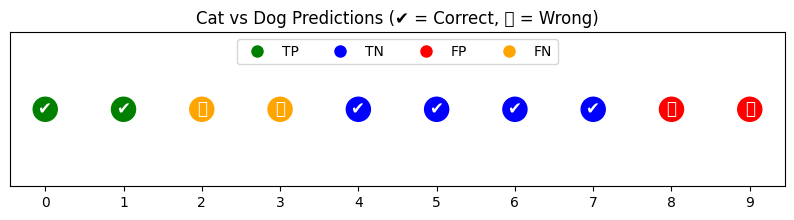

In [6]:

import matplotlib.pyplot as plt
# Plot predictions
plt.figure(figsize=(10, 2))

# Markers:
# TP = green 
# TN = blue 
# FP = red 
# FN = orange

colors = []
markers = []

for true, pred in zip(y_true, y_pred):
    if true == 1 and pred == 1:
        colors.append('green')  # TP
        markers.append('✔️')
    elif true == 0 and pred == 0:
        colors.append('blue')  # TN
        markers.append('✔️')
    elif true == 0 and pred == 1:
        colors.append('red')   # FP
        markers.append('❌')
    elif true == 1 and pred == 0:
        colors.append('orange') # FN
        markers.append('❌')

x = list(range(len(y_true)))
y = [0]*len(y_true)

plt.scatter(x, y, c=colors, s=300)

# Label each point with marker
for i in range(len(x)):
    plt.text(x[i], y[i], markers[i], fontsize=12, ha='center', va='center', color='white')

# Add legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='TP', markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='TN', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='FP', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='FN', markerfacecolor='orange', markersize=10),
]

plt.legend(handles=legend_elements, loc='upper center', ncol=4)
plt.title('Cat vs Dog Predictions (✔️ = Correct, ❌ = Wrong)')
plt.yticks([])
plt.xticks(x)
plt.show()